In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def logistic_map(x, alpha=4):
    return alpha*x*(1-x)

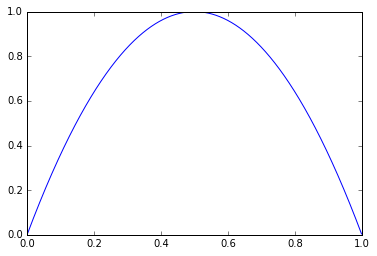

In [3]:
x = np.array([n/1000 for n in range(1000)])
plt.plot(x, logistic_map(x))

In [4]:
n_steps = 50
n_samples = 1000

In [5]:
data = [np.random.rand(n_samples, 1)]
for i in range(n_steps):
    data.append(logistic_map(data[-1]))

In [6]:
X = np.array(data[:-1])
y = data[-1]

In [7]:
X.shape, y.shape

((50, 1000, 1), (1000, 1))

In [8]:
p = .15
ides_permuted = np.random.permutation(n_samples)
split_idx = int(np.floor(n_samples*p))
X_test = X[:, ides_permuted[:split_idx], :]
y_test = y[ides_permuted[:split_idx], :]
X_train = X[:, ides_permuted[split_idx:], :]
y_train = y[ides_permuted[split_idx:], :]

In [9]:
X_test.shape, X_train.shape

((50, 150, 1), (50, 850, 1))

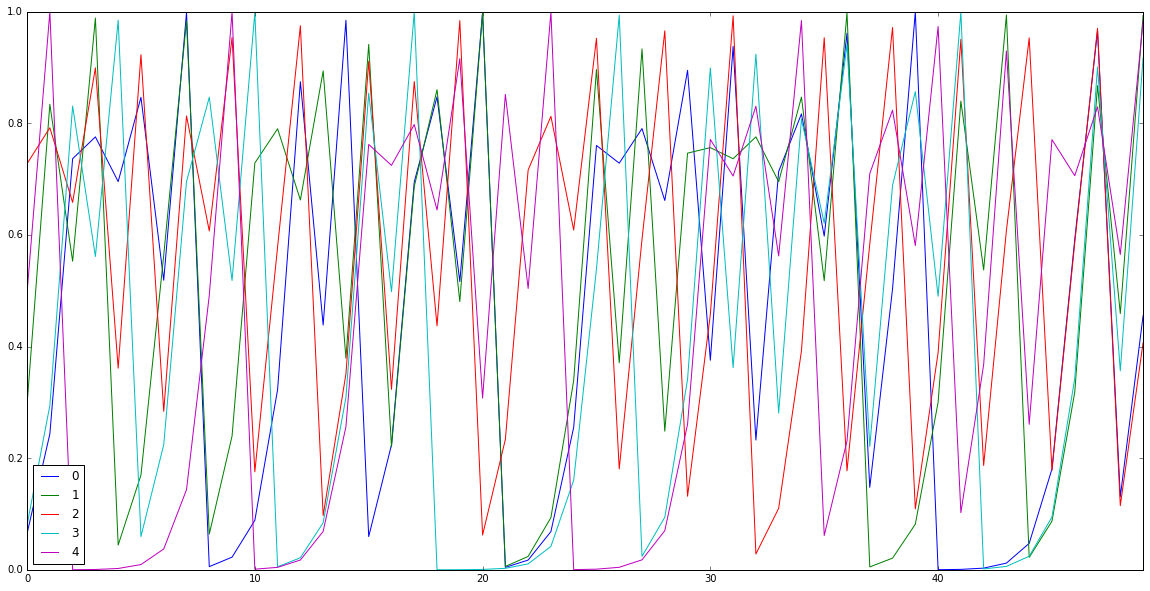

In [10]:
pd.DataFrame(X_test[:, :5, 0]).plot(figsize=(20, 10))

In [11]:
X1 = [[[1, 1.1], [2, 2.1], [3, 3.1]], [[11, 11.1], [12, 12.1], [13, 13.1]]]



learning_rate = tf.placeholder(tf.float32)
inputs = tf.placeholder(tf.float32, shape = [None, None, 1])
outputs = tf.placeholder(tf.float32, shape = [None, 1])

rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=1)
rnn_outputs, _ = tf.nn.dynamic_rnn(rnn_cell, inputs, dtype=tf.float32)
predictions = rnn_outputs[-1]
errors = outputs - predictions
loss = tf.reduce_sum(tf.square(outputs - predictions), axis=0)
optimaizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimaizer.minimize(loss)

In [15]:
lr = 0.1
epochs = 10

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    train_feed_dict = {inputs: X_train, outputs: y_train, learning_rate: lr}
    for i in range(epochs):
        sess.run(train, train_feed_dict)
        _loss = sess.run(loss, train_feed_dict)
        print(_loss)
        
    gen_feed_dict = {inputs: [[[0.3]]]}
    print(sess.run(predictions, gen_feed_dict))
    
    gen_feed_dict = {inputs: [[[0.3]]]}
    print(sess.run(predictions, gen_feed_dict))

[ 411.27694702]
[ 310.16680908]
[ 255.01335144]
[ 220.68904114]
[ 196.15415955]
[ 176.36256409]
[ 159.06719971]
[ 143.50749207]
[ 129.85852051]
[ 118.94669342]
[[ 0.16911459]]
[[ 0.16911459]]
